<a href="https://colab.research.google.com/github/BIRDRED/PUC_Redes_Neurais/blob/main/Gustavo_Melo_Projeto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import pickle
import warnings
import string
import time
from unicodedata import normalize
from nltk.corpus import stopwords
from nltk.metrics.confusionmatrix import ConfusionMatrix
from nltk.stem import RSLPStemmer
import numpy
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import csv
import nltk

In [2]:
from nltk import tokenize
import re
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [3]:
nltk.download(['rslp', 'punkt', 'stopwords'])

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
from tqdm.auto import tqdm

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
colab = True
if colab:
    !git clone https://github.com/mdrs-thiago/PUC_Redes_Neurais
    import os
    os.chdir('/content/PUC_Redes_Neurais/pos_grad/lista 1')

Cloning into 'PUC_Redes_Neurais'...
remote: Enumerating objects: 321, done.
remote: Counting objects: 100% (321/321), done.
remote: Compressing objects: 100% (252/252), done.
remote: Total 321 (delta 124), reused 242 (delta 48), pack-reused 0
Receiving objects: 100% (321/321), 3.99 MiB | 15.73 MiB/s, done.
Resolving deltas: 100% (124/124), done.


In [7]:
pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 9.3 MB/s eta 0:00:00


In [8]:
tqdm.pandas()

In [9]:
from unidecode import unidecode

In [10]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,ComplementNB,BernoulliNB

In [11]:
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score, classification_report

In [12]:
from sklearn.svm import SVC

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from utils import CustomDataset, transform_data, plot_confusion_matrix
from model_utils import train

In [15]:
from sklearn.preprocessing import LabelEncoder
from numpy import array

In [16]:
from utils import CustomDataset, transform_data, plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

# Pré- Processamento

In [17]:
Base_DD = pd.read_csv('/content/drive/MyDrive/Mestrado/Redes Neurais/Projetos/Trabalho Final/base_app_balanceado.csv', sep=",",dtype={'Relato': object})

In [18]:
def removeAcentos(texto):

    frasesSemAcento = []
    semAcento = [normalize('NFKD', p).encode('ASCII','ignore').decode('ASCII') for p in texto]
    frasesSemAcento.append(semAcento)
    return frasesSemAcento

In [19]:
stemmer = nltk.stem.RSLPStemmer()

In [20]:
def tokenize(text):
    tokens = [word for sent in nltk.sent_tokenize(unidecode(text)) for word in nltk.word_tokenize(sent)]
    filtered_tokens = [token for token in tokens if re.search('[a-zA-Z]', token)]
    stems = [stemmer.stem(t) for t in filtered_tokens if len(t) > 0]
    return stems

In [21]:
Base_DD.loc[:, 'nltk_stemm'] = Base_DD.Relato.progress_map(tokenize)

  0%|          | 0/2500 [00:00<?, ?it/s]

In [22]:
frasesSemAcento = []
for texto in Base_DD['nltk_stemm']:
  for palavras in texto:
    semAcento = unidecode(palavras)
    frasesSemAcento.append(semAcento)

In [23]:
dictPos = {
    'Violência doméstica': 0,
    'Tráfico de Drogas / Armas': 1,
    'Roubos em Geral': 2,
    'Outros': 3,
    'Homicidio': 4
}

In [24]:
Base_DD['Assunto'] = Base_DD['Assunto'].map(dictPos)

# Conversão de Modelos

In [25]:
x = Base_DD['nltk_stemm']
y = Base_DD['Assunto']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x,y,random_state = 42,test_size=0.20,stratify = y,shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=42)

In [28]:
X_train

483     ['bo, 'noit, 'acab, 'cheg, 'cas, 'nov, 'ocorr,...
1934             [o, 'maquin, 'cac, 'niquel, 'expost, 'b]
320     ['doil, 'cachorr, 'medi, 'port, 'branc, 'manch...
925     ['quer, 'denunci, 'vez, 'tot, 'descans, 'v, 'a...
1380    ['moment, 'vari, 'element, 'arm, 'ru, 'laur, '...
                              ...                        
1796    ['abandon, 'id, 'senh, 'fic, 'so, 'cas, 'condi...
1408               ['furt, 'energ, 'ampl, 'med, 'adulter]
2185    ['visa, 'propr, 'esc, 'induz, 'delit, 'ilicit,...
1365                    ['roub, 'relogi, 'ru, 'don, 'nov]
1340    ['pratic, 'tod, 'di, 'crimin, 'roub, 'carr, 'c...
Name: nltk_stemm, Length: 1600, dtype: object

In [ ]:
conversor = TfidfVectorizer(analyzer = 'word', tokenizer=lambda doc: doc, lowercase=False)
X_train = conversor.fit_transform(X_train)
X_test =  conversor.transform(X_test)
X_val =   conversor.transform(X_val)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


# Modelos

## SVM

In [ ]:
model = SVC(kernel="poly",  C=1, gamma=1,   coef0=1,  degree=3, tol=0.0001, random_state=310)

In [ ]:
model.fit(X_train, y_train)


SVC(C=1, coef0=1, gamma=1, kernel='poly', random_state=310, tol=0.0001)

In [ ]:
y_pred_SVM = model.predict(X_test)
acuracia = accuracy_score(y_test, y_pred_SVM)
print('Acuracia de teste: ', acuracia)


Acuracia de teste:  0.774


              precision    recall  f1-score   support

           0       0.77      0.80      0.78       100
           1       0.71      0.82      0.76       100
           2       0.79      0.78      0.78       100
           3       0.68      0.65      0.66       100
           4       0.95      0.82      0.88       100

    accuracy                           0.77       500
   macro avg       0.78      0.77      0.78       500
weighted avg       0.78      0.77      0.78       500



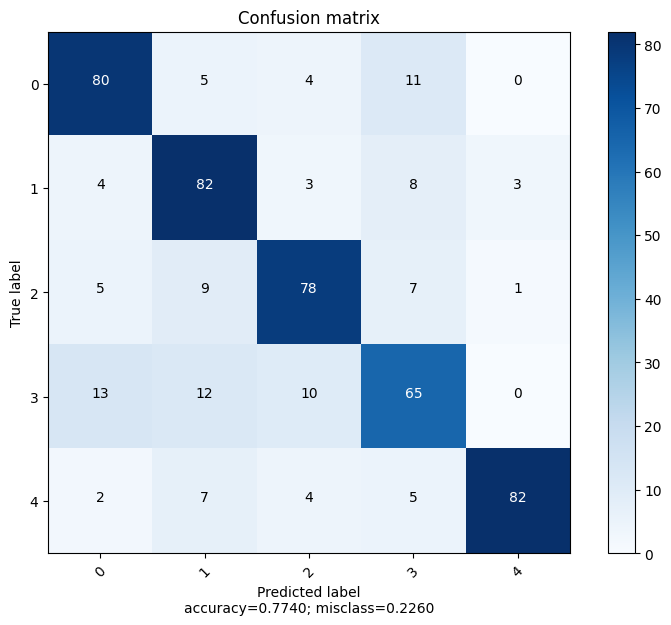

In [ ]:
print(classification_report(y_test, y_pred_SVM))

cm = confusion_matrix(y_test, y_pred_SVM)

plot_confusion_matrix(cm)

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model  = KNeighborsClassifier(algorithm='auto', leaf_size =30, n_neighbors=50, p=2,weights='uniform',metric='minkowski')

In [ ]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=50)

In [ ]:
y_pred_KNN = model.predict(X_test)
acuracia = accuracy_score(y_test, y_pred_KNN)
print('Acuracia de teste: ', acuracia)

Acuracia de teste:  0.688


              precision    recall  f1-score   support

           0       0.61      0.78      0.69       100
           1       0.57      0.71      0.63       100
           2       0.79      0.77      0.78       100
           3       0.68      0.51      0.58       100
           4       0.88      0.67      0.76       100

    accuracy                           0.69       500
   macro avg       0.71      0.69      0.69       500
weighted avg       0.71      0.69      0.69       500



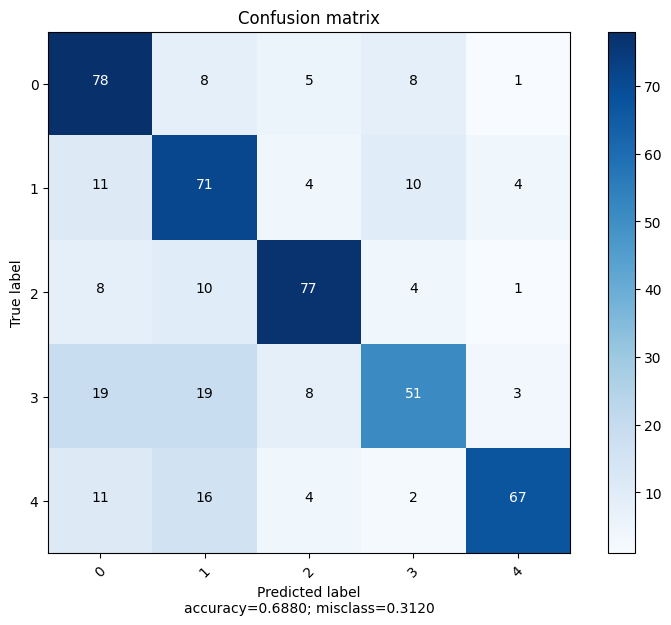

In [ ]:
print(classification_report(y_test, y_pred_KNN))

cm = confusion_matrix(y_test, y_pred_KNN)

plot_confusion_matrix(cm)

## Naive Bayes

In [ ]:
model = ComplementNB(alpha=2, class_prior=None, fit_prior=True, norm=False)

In [ ]:
model.fit(X_train, y_train)

ComplementNB(alpha=2)

In [ ]:
y_pred_NB = model.predict(X_test)
acuracia = accuracy_score(y_test, y_pred_NB)
print('Acuracia de teste: ', acuracia)

Acuracia de teste:  0.734


              precision    recall  f1-score   support

           0       0.67      0.87      0.76       100
           1       0.61      0.78      0.69       100
           2       0.82      0.80      0.81       100
           3       0.76      0.53      0.62       100
           4       0.92      0.69      0.79       100

    accuracy                           0.73       500
   macro avg       0.76      0.73      0.73       500
weighted avg       0.76      0.73      0.73       500



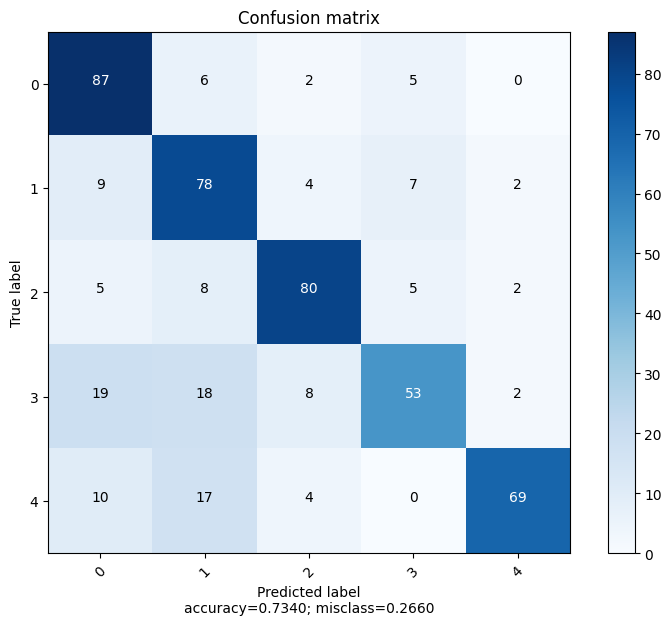

In [ ]:
print(classification_report(y_test, y_pred_NB))

cm = confusion_matrix(y_test, y_pred_NB)

plot_confusion_matrix(cm)

## Árvore de Decisão

In [ ]:
model = DecisionTreeClassifier(criterion="gini",max_depth=20,min_samples_leaf=21)

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=21)

In [ ]:
y_pred_arv = model.predict(X_test)
acuracia = accuracy_score(y_test, y_pred_arv)
print('Acuracia de teste: ', acuracia)

Acuracia de teste:  0.65


              precision    recall  f1-score   support

           0       0.66      0.66      0.66       100
           1       0.61      0.59      0.60       100
           2       0.80      0.65      0.72       100
           3       0.46      0.62      0.53       100
           4       0.83      0.73      0.78       100

    accuracy                           0.65       500
   macro avg       0.67      0.65      0.66       500
weighted avg       0.67      0.65      0.66       500



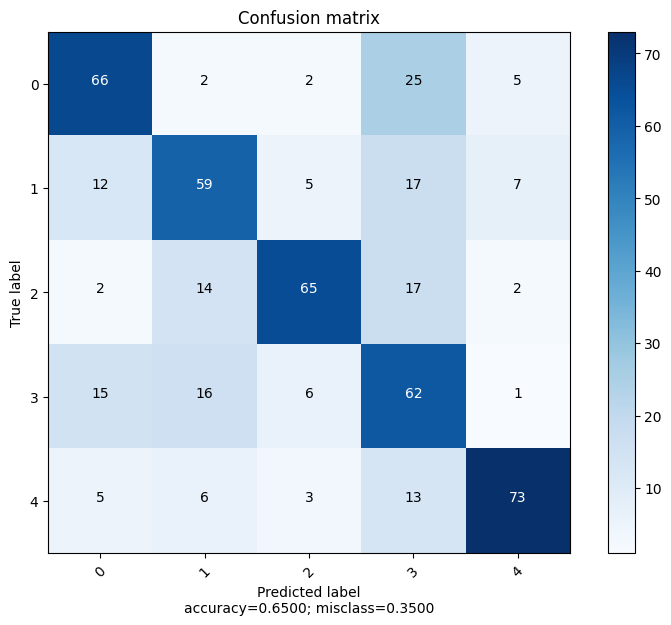

In [ ]:
print(classification_report(y_test, y_pred_arv))

cm = confusion_matrix(y_test, y_pred_arv)

plot_confusion_matrix(cm)

# Redes Neurais - MLP

In [ ]:
class NeuralNetwork(torch.nn.Module):
  '''
  Objeto criado para facilitar o desenvolvimento dos scripts das aulas práticas.
  Opção alternativa à criação externa fdo modelo. Basicamente serve como um
  'agregador'  de trechos comuns para a criação do modelo. Por exemplo, ao invés
  de gastar n+1 linhas para a criação de um modelo com n camadas, podemos criar
  o mesmo modelo com apenas uma linha.

  Parâmetros de entrada:
  - hidden_neurons: Lista com a quantidade de neurônios na camada escondida.
  - hidden_activation: Função de ativação para cada camada escondida. Aceita
  como parâmetro string ou lista. Caso o parâmetro receba string, então a mesma
  função de ativação é utilizada para todas as camadas escondidas. Caso seja uma
  lista, cada camada terá sua propria função de ativação definida pela lista.
  - output_activation: Função de ativação para a camada de saída.
  - lr: Taxa de aprendizado
  - n_input: Tamanho do vetor de entrada.
  - n_output: Saída do modelo.
  '''
  def __init__(self,hidden_neurons = 4, hidden_activation = 'relu', output_activation='softmax', lr = 0.05, n_input = 1, n_output = 1):
    # create model
    super(NeuralNetwork, self).__init__()

    self.activations = {'relu': nn.ReLU(), 'sigmoid':nn.Sigmoid(), 'softmax':nn.Softmax()}

    self.fc1 = nn.Linear(n_input, hidden_neurons)
    self.ha = self.activations[hidden_activation]
    self.fc2 = nn.Linear(hidden_neurons, n_output)
    #self.out = self.activations[output_activation]

    #self.out = nn.Sigmoid() #Para o caso binário
  def forward(self,x):
    h = self.fc1(x)
    h1 = self.ha(h)
    y = self.fc2(h1)
    #y = self.out(h2)
    return y

  def predict(self, x, binary=True):
    y_hat = self.forward(x)

    if binary:
      y_pred = torch.round(torch.sigmoid(y_hat))
      y_pred = y_pred.detach().numpy()
    else:
      y_pred = torch.argmax(y_hat, dim=1)

    return y_pred

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
n_input = X_train.todense().shape[1]

In [ ]:
encoder = LabelEncoder()
y = encoder.fit_transform(Base_DD['Assunto'])
n_output = encoder.classes_.shape[0]

In [ ]:
lr = 0.01

In [ ]:
binary = False

In [ ]:
model = NeuralNetwork(n_input = n_input, n_output=n_output,output_activation='sigmoid')

In [ ]:
train_dataset = CustomDataset(torch.from_numpy(X_train.todense()).float(),  torch.from_numpy(np.asarray(y_train,dtype=np.float16)).long())
val_dataset = CustomDataset(torch.from_numpy(X_val.todense()).float(), torch.from_numpy(np.asarray(y_val,dtype=np.float16)).long())
test_dataset = CustomDataset(torch.from_numpy(X_test.todense()).float(), torch.from_numpy(np.asarray(y_test,dtype=np.float16)).long())

In [ ]:
train_loader = DataLoader(dataset=train_dataset,batch_size=32)
val_loader = DataLoader(dataset=val_dataset, batch_size=1)
test_loader = DataLoader(dataset=test_dataset, batch_size=1)

In [ ]:
history, y_hat = train(model, train_loader, val_dataset, epochs=150, lr=1, device=device, binary=False)

  0%|          | 0/150 [00:00<?, ?it/s]

Epoch 001: | Train Loss: 1.550 | Val Loss: 1.3729 | Train Acc: 27.3200| Val Acc: 34.0000
Epoch 002: | Train Loss: 1.312 | Val Loss: 1.2107 | Train Acc: 43.6800| Val Acc: 42.0000
Epoch 003: | Train Loss: 1.110 | Val Loss: 1.0128 | Train Acc: 53.9000| Val Acc: 61.0000
Epoch 004: | Train Loss: 0.941 | Val Loss: 0.8875 | Train Acc: 61.8000| Val Acc: 65.0000
Epoch 005: | Train Loss: 0.775 | Val Loss: 1.8899 | Train Acc: 70.4200| Val Acc: 40.0000
Epoch 006: | Train Loss: 0.675 | Val Loss: 1.4865 | Train Acc: 73.7800| Val Acc: 48.0000
Epoch 007: | Train Loss: 0.601 | Val Loss: 1.3183 | Train Acc: 77.2600| Val Acc: 51.0000
Epoch 008: | Train Loss: 0.496 | Val Loss: 0.6631 | Train Acc: 84.4600| Val Acc: 78.0000
Epoch 009: | Train Loss: 0.433 | Val Loss: 0.6630 | Train Acc: 86.5000| Val Acc: 76.0000
Epoch 010: | Train Loss: 0.403 | Val Loss: 0.6683 | Train Acc: 87.0000| Val Acc: 77.0000
Epoch 011: | Train Loss: 0.309 | Val Loss: 0.7183 | Train Acc: 90.2400| Val Acc: 73.0000
Epoch 012: | Train Lo

In [ ]:
y_pred_rn = model.predict(test_dataset.X_data, binary=False)

In [ ]:
accuracy_score(y_test, y_pred_rn)

0.732

              precision    recall  f1-score   support

           0       0.69      0.86      0.76       100
           1       0.70      0.73      0.71       100
           2       0.75      0.66      0.70       100
           3       0.59      0.54      0.56       100
           4       0.97      0.87      0.92       100

    accuracy                           0.73       500
   macro avg       0.74      0.73      0.73       500
weighted avg       0.74      0.73      0.73       500



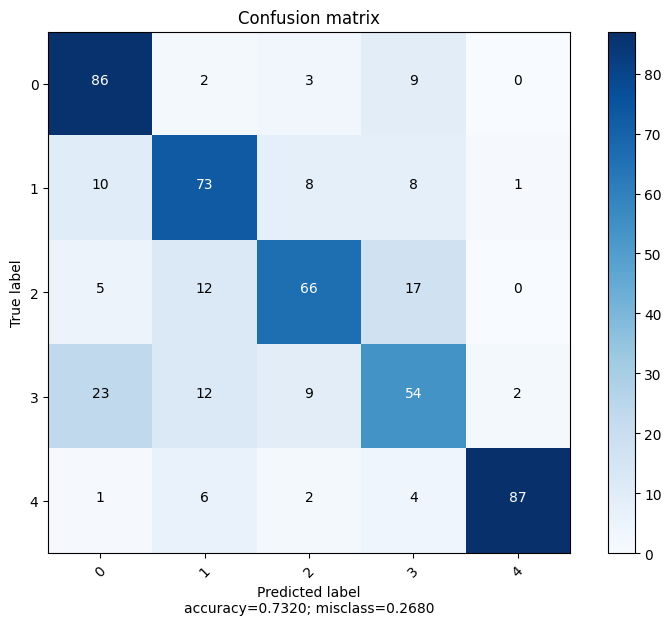

In [ ]:
print(classification_report(y_test, y_pred_rn))

cm = confusion_matrix(y_test, y_pred_rn)

plot_confusion_matrix(cm)

# Ensemble

In [ ]:
y_test

2092    4
1406    2
1939    3
1059    2
1004    2
       ..
716     1
264     0
895     1
1765    3
1381    2
Name: Assunto, Length: 500, dtype: int64

In [ ]:
y_pred_rn

tensor([4, 2, 3, 3, 2, 4, 2, 1, 4, 4, 3, 1, 0, 0, 2, 4, 1, 0, 1, 4, 0, 2, 4, 3,
        3, 1, 1, 3, 0, 4, 2, 4, 3, 4, 3, 3, 4, 4, 3, 3, 1, 3, 3, 0, 0, 1, 1, 2,
        2, 1, 0, 3, 2, 1, 2, 2, 0, 4, 1, 0, 0, 2, 2, 0, 0, 1, 2, 0, 3, 2, 3, 4,
        2, 0, 2, 4, 3, 1, 0, 1, 0, 3, 0, 2, 3, 2, 4, 2, 3, 4, 3, 4, 4, 4, 2, 3,
        0, 4, 4, 2, 2, 0, 0, 2, 4, 1, 1, 4, 0, 2, 4, 1, 1, 1, 4, 2, 4, 4, 1, 0,
        2, 2, 4, 2, 1, 0, 1, 0, 0, 0, 2, 0, 1, 3, 0, 1, 3, 0, 2, 1, 4, 1, 3, 4,
        1, 0, 0, 4, 1, 3, 2, 4, 0, 2, 3, 2, 2, 4, 0, 1, 2, 2, 0, 4, 3, 0, 4, 0,
        4, 4, 1, 3, 4, 2, 1, 4, 0, 0, 1, 1, 3, 4, 4, 3, 4, 1, 0, 3, 3, 2, 3, 2,
        0, 4, 4, 2, 4, 1, 0, 0, 0, 0, 3, 0, 3, 2, 3, 2, 4, 4, 0, 0, 4, 1, 3, 0,
        3, 1, 1, 0, 2, 4, 0, 4, 3, 0, 4, 0, 3, 1, 3, 0, 1, 0, 1, 3, 2, 2, 0, 1,
        4, 4, 3, 1, 4, 2, 4, 4, 3, 0, 1, 3, 1, 4, 2, 1, 3, 0, 4, 1, 0, 1, 3, 0,
        0, 3, 4, 4, 1, 4, 4, 2, 0, 0, 0, 1, 0, 1, 2, 4, 3, 2, 4, 0, 1, 2, 1, 3,
        1, 1, 0, 0, 1, 4, 1, 4, 3, 1, 2,

In [ ]:
d = {'pred': y_test.to_numpy(), 'svm': y_pred_SVM, 'knn': y_pred_KNN, 'arvore': y_pred_arv, 'naive bayes': y_pred_NB, 'redes neurais': y_pred_rn}

In [ ]:
df_ensemble = pd.DataFrame(data=d,index=np.arange(0,500))

In [ ]:
df_ensemble.to_csv('/content/drive/MyDrive/Mestrado/Redes Neurais/Projetos/Trabalho Final/resultadofinal.csv', sep=";")

In [ ]:
ensemble = []
for i in range(len(df_ensemble)):
    matrizEnsemble = [0, 0, 0 , 0 , 0]
    if(df_ensemble['pred'][i] == df_ensemble['svm'][i]):
        matrizEnsemble[df_ensemble['pred'][i]]  = matrizEnsemble[df_ensemble['svm'][i]] + 1
    max_list = max(matrizEnsemble)
    if(max_list == 1):
        assunto_escolhido = df_ensemble['svm'][i]
    ensemble[i] =


In [ ]:
ensemble = []
for i in range(len(df_ensemble)):
  matrizEnsemble = [0, 0, 0 , 0 , 0]
  if(df_ensemble['pred'][i] == df_ensemble['svm'][i]):
    matrizEnsemble[df_ensemble['pred'][i]]  = matrizEnsemble[df_ensemble['svm'][i]] + 1
  if(df_ensemble['pred'][i] == df_ensemble['knn'][i]):
    matrizEnsemble[df_ensemble['pred'][i]]  = matrizEnsemble[df_ensemble['knn'][i]] + 1
  if(df_ensemble['pred'][i] == df_ensemble['arvore'][i]):
    matrizEnsemble[df_ensemble['pred'][i]]  = matrizEnsemble[df_ensemble['arvore'][i]] + 1
  if(df_ensemble['pred'][i] == df_ensemble['naive bayes'][i]):
    matrizEnsemble[df_ensemble['pred'][i]]  = matrizEnsemble[df_ensemble['naive bayes'][i]] + 1
  if(df_ensemble['pred'][i] == df_ensemble['redes neurais'][i]):
    matrizEnsemble[df_ensemble['pred'][i]]  = matrizEnsemble[df_ensemble['redes neurais'][i]] + 1

  max_list = max(matrizEnsemble)
  if(max_list == 1):
    assunto_escolhido = df_ensemble['svm'][i]
  if(max_list == 2):
    assunto_escolhido = df_ensemble['svm'][i]
  else:
    assunto_escolhido = matrizEnsemble.index(max_list)
  ensemble.append(assunto_escolhido)

In [ ]:
accuracy_score(y_test, ensemble)

0.876

              precision    recall  f1-score   support

           0       0.68      0.98      0.80       100
           1       0.97      0.88      0.92       100
           2       0.96      0.90      0.93       100
           3       0.91      0.75      0.82       100
           4       0.99      0.87      0.93       100

    accuracy                           0.88       500
   macro avg       0.90      0.88      0.88       500
weighted avg       0.90      0.88      0.88       500



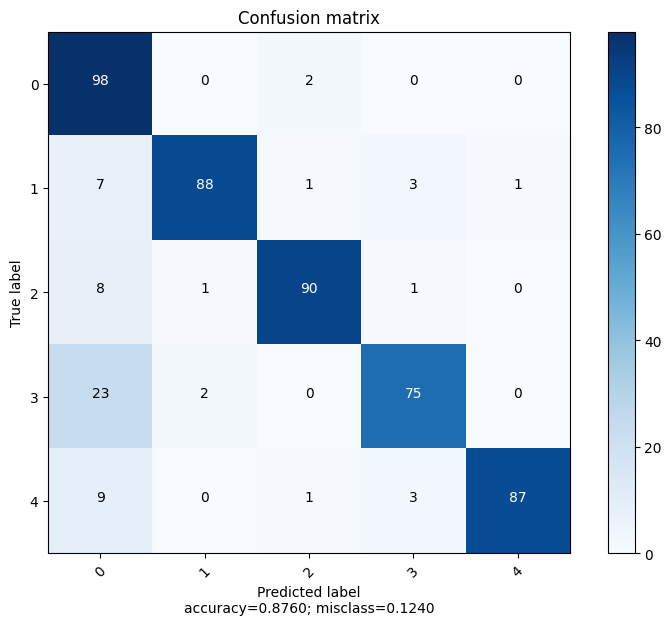

In [ ]:
print(classification_report(y_test, ensemble))

cm = confusion_matrix(y_test, ensemble)

plot_confusion_matrix(cm)